# Introduction

The Shapiro-Wilk test is a widely used statistical procedure for testing the normality of a data set. Developed by Samuel Shapiro and Martin Wilk in 1965, this test is particularly effective for small sample sizes, typically considered to be less than 50. The test calculates a statistic, often denoted as W, which evaluates the degree to which a set of data conforms to a normal distribution.

Here's a brief overview of the test:

1. **Purpose**: The primary objective of the Shapiro-Wilk test is to determine whether a given sample comes from a normally distributed population. This is crucial in statistics, as many parametric tests assume normality of the data.

2. **Method**: The test compares the order statistics (sorted data points) of the sample to the expected values of these order statistics if the data were normally distributed. The W statistic is a measure of how closely the data points match the normal distribution.

3. **W Statistic**: The W value ranges from 0 to 1, where values close to 1 indicate that the data are likely normally distributed. A lower W value suggests deviations from normality.

4. **Interpretation**: The result of the test includes the W statistic and a p-value. The null hypothesis of the test is that the data are normally distributed. If the p-value is less than a chosen significance level (commonly 0.05), the null hypothesis is rejected, suggesting that the data are not normally distributed.

5. **Applications**: The Shapiro-Wilk test is used in various fields for preliminary data analysis, especially where normality is an assumption for further statistical tests, such as ANOVA, t-tests, and regression analysis.

Overall, the Shapiro-Wilk test is a fundamental tool in statistics for assessing the normality of data, providing an essential step in many analytical procedures.

**In this Jupyter notebook we will plot the distribution of W statistic for sample size $n$ through Monte Carlo simluation. Later we will compare the test result of our**

# W statistic

## Some theory

The W statistic is give by the following expression:

$$
W = \frac{\left(\sum\limits_{j=1}^{n} a_j X_{(j)}\right)^2}{\sum\limits_{j=1}^{n} (X_j - \overline{X})^2}
$$

Where 

$X_{(j)}$ is the $j^{th}$ order statistic. For instance, we draw a sample of size 10 from a distribution, we arrange the sample in ascending order. So $X_{(1)}$ would be the smallest value of the sample and $X_{(10)}$ would be the highest.

$a_j \in [a_1, a_2, ..., a_n] = \frac{1}{C} \left( m^{T}V^{-1} \right)$

$C := (m^T V^{-1} V^{-1} m)^\frac{1}{2}$

$V$ is covariance matrix where $V_{i,j}=\mathbb{E}[(Z_{(i)}-m_i)(Z_{(j)}-m_j)]$

$m := [m_1, m_2, ..., m_n]$, where $m_i:= \mathbb{E}[Z_{(i)}]$

$Z_{(i)}$ is $i^{th}$ order statistic. And $Z_i$ is $i.i.d$ $N(0,1)$

**Note:** $\mathbb{E}[Z_{(i)}]$ of order statistics depends on sample size. It is because order statistics are determined by the ranks of the data points in a sample, and as the sample size changes, the distribution of these ranks changes. As the sample size increases, the range of possible values for a particular order statistic also increases. For instance, the maximum value in a larger sample is likely to be greater than the maximum in a smaller sample simply because there are more data points from which the maximum can be drawn.


## Calculating expectation of order statistics

In a sample of size $(n)$ the expected value of the $(r)$ th largest order statistic is given by
$$
E(r, n) = \frac{n!}{(r - 1)!(n - r)!} \int_{-\infty}^{\infty} x(1 - \Phi(x))^{r-1}(\Phi(x))^{n-r}\phi(x) \, dx,
$$
where 
$$
\phi(x) = \frac{1}{\sqrt{2\pi}}\exp\left(-\frac{1}{2}x^2\right)
$$
and
$$
\Phi(x) = \int_{-\infty}^{x} \phi(z) \, dz.
$$

by Royston (1982).

In [2]:
# importing libraries
from scipy.integrate import quad
from scipy.special import binom
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Calculation expectation
inf, phi, Phi = float('inf'), norm.pdf, norm.cdf

def E(r, n):
    def f(x):   
        F = Phi(x)
        return x*(1-F)**(r-1)*F**(n-r)*phi(x)
    return r*binom(n, r)*quad(f, -inf, inf)[0]

## Creating vector m

In [4]:
# defining the sample size, let
n=10

In [5]:
# creating vector m
m=np.array([E(i,n) for i in range(1,n+1)])
m=m[::-1] #reversing the order since Royston (1982) give j-th largest order statistic
m=m.reshape((n,1))
m

array([[-1.53875273],
       [-1.00135704],
       [-0.65605911],
       [-0.3757647 ],
       [-0.12266775],
       [ 0.12266775],
       [ 0.3757647 ],
       [ 0.65605911],
       [ 1.00135704],
       [ 1.53875273]])

## Creating covariance matrix V

$V_{i,j}=\mathbb{E}[(Z_{(i)}-m_i)(Z_{(j)}-m_j)]$

To create the  covariance matrix $V$, we run a small simulation.

In [6]:
np.random.seed(2609)
matrix=np.random.normal(0,1,(1000000,n))
matrix=np.sort(matrix,axis=1)
cov_matrix = np.cov(matrix, rowvar=False)
cov_matrix

array([[0.34452649, 0.17148268, 0.11636244, 0.08797247, 0.07062324,
        0.05835302, 0.04886994, 0.04097862, 0.03395854, 0.02680342],
       [0.17148268, 0.21470557, 0.14675017, 0.11149474, 0.08966637,
        0.07403015, 0.06211368, 0.05214047, 0.04330846, 0.03371779],
       [0.11636244, 0.14675017, 0.17506564, 0.13352363, 0.10760177,
        0.08901699, 0.0748482 , 0.06288995, 0.05228875, 0.0408636 ],
       [0.08797247, 0.11149474, 0.13352363, 0.15766073, 0.12738732,
        0.10559131, 0.08881747, 0.07477236, 0.06209446, 0.04865725],
       [0.07062324, 0.08966637, 0.10760177, 0.12738732, 0.15119823,
        0.12574584, 0.10604351, 0.08933701, 0.07425264, 0.05850678],
       [0.05835302, 0.07403015, 0.08901699, 0.10559131, 0.12574584,
        0.15124169, 0.12780721, 0.10788928, 0.0899069 , 0.07094881],
       [0.04886994, 0.06211368, 0.0748482 , 0.08881747, 0.10604351,
        0.12780721, 0.15819085, 0.13387733, 0.1119317 , 0.08859096],
       [0.04097862, 0.05214047, 0.0628899

## Creating the length C

$C := (m^T V^{-1} V^{-1} m)^\frac{1}{2}$

In [7]:
C = (m.T @ (np.linalg.inv(cov_matrix)) @ (np.linalg.inv(cov_matrix)) @ m)**(0.5) # '@' multplies two matrices
C

array([[6.17520116]])

## Creating vector a

$a = [a_1, a_2, ..., a_n] = \frac{1}{C} \left( m^{T}V^{-1} \right)$



In [8]:
a=(m.T @ (np.linalg.inv(cov_matrix)))/(C)
a

array([[-0.57562863, -0.3262136 , -0.21140603, -0.12385761, -0.04142296,
         0.03790772,  0.12117604,  0.21577968,  0.32696584,  0.57523832]])

## Monte Carlo simulation to W statistic distribution

$$
W = \frac{\left(\sum\limits_{j=1}^{n} a_j X_{(j)}\right)^2}{\sum\limits_{j=1}^{n} (X_j - \overline{X})^2}
$$

In [22]:
# generating a many samples
iteration=1000000
np.random.seed(2609)
x_mat=np.random.normal(0,1,(iteration,n))
x_mat=np.sort(x_mat,axis=1)
x_mat

array([[-2.02258982, -1.19155678, -0.81895459, ...,  1.30640262,
         1.45529678,  2.35676065],
       [-2.3236977 , -1.14898889, -0.55883736, ...,  0.19719931,
         0.65898349,  1.63017364],
       [-1.38408064, -1.08530663, -0.80016064, ...,  0.56901273,
         1.2402628 ,  2.40098544],
       ...,
       [-1.44008624, -1.24841506, -0.65395294, ..., -0.04813313,
         0.68951906,  1.21878072],
       [-0.81335319, -0.78517371, -0.69083909, ...,  0.77903271,
         1.52354765,  1.81966713],
       [-1.38512201, -1.02405077, -0.93704861, ...,  0.60640053,
         0.66852956,  1.35122507]])

In [23]:
# calculation the variance of each sample
x_var=np.var(x_mat, axis=1,ddof=1)
x_var

array([1.85990199, 1.09925087, 1.35017523, ..., 0.64084908, 0.93247314,
       0.75201877])

In [24]:
denomenator=(x_var)*(n-1) #this is our denomenator
denomenator=denomenator.reshape(1,iteration)
denomenator

array([[16.73911793,  9.89325784, 12.15157709, ...,  5.76764168,
         8.39225825,  6.76816897]])

In [25]:
numerator = (a @ x_mat.T)**2
numerator=numerator.reshape(1,iteration)
numerator

array([[16.37646908,  9.54869893, 11.25554065, ...,  5.39753648,
         7.49777374,  6.57979586]])

In [26]:
W=numerator/denomenator
W

array([[0.97833525, 0.96517235, 0.92626172, ..., 0.93583076, 0.89341552,
        0.97216779]])

In [27]:
W=W.flatten()

In [28]:
W.shape

(1000000,)

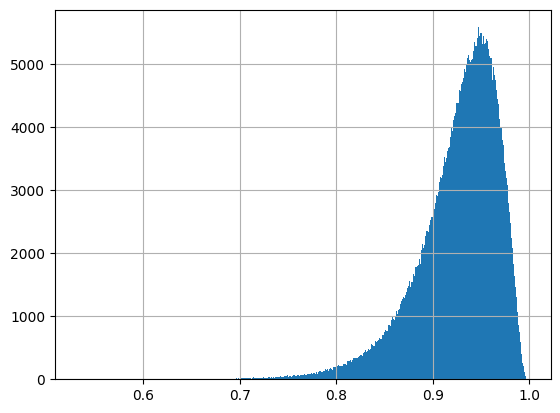

In [31]:
plt.hist(W,bins=1000)
plt.grid()
plt.show()

# References

Royston, J. P. (1982). Algorithm AS 177: Expected normal order statistics (exact and approximate). Journal of the royal statistical society. Series C (Applied statistics), 31(2), 161-165.